# Analisis para saber si se van a alinear o se pueden alinear adecuadamente los candidatos

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [153]:
cliques1 = pd.read_csv('../clique1.csv')
cliques2 = pd.read_csv('../clique2.csv')

candidatos = pd.read_csv('../candi.csv')

max_clique1 = pd.read_csv('../clique1_maximal.csv')
max_clique2 = pd.read_csv('../clique2_maximal.csv')

df_cliques1 = pd.read_csv('../clique1_df_atributos.csv')
df_cliques2 = pd.read_csv('../clique2_df_atributos.csv')

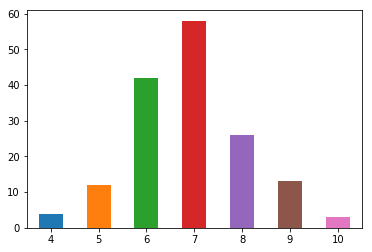

In [154]:
max_clique1.numero_elementos.value_counts(sort=False).plot.bar(rot=0)

In [155]:
mc_8 = max_clique1[max_clique1.numero_elementos==7].drop('numero_elementos',1)

In [158]:
cliques1.head(2)

,0,1,2,3,4,5,6,7,ss_0,ss_1,ss_2,ss_3,ss_4,ss_5,ss_6,ss_7,coord_clique_0,coord_clique_1,coord_clique_2,coord_clique_3,coord_clique_4,coord_clique_5,coord_clique_6,coord_clique_7,matriz_coordenadas,baricentro_clique,vec_gorro_0,vec_gorro_1,vec_gorro_2,vec_gorro_3,vec_gorro_4,vec_gorro_5,vec_gorro_6,vec_gorro_7,vectores_gorro,distancia_promedio
0,98.00000,99.00000,100.00000,130.00000,86.00000,87.00000,88.00000,89.00000,B,B,B,B,B,B,B,B,[21.017 73.308 -0.443],[21.955 72.489 -0.607],[20.083 73.458 -1.264],[20.12 64.847 15.689],[21.135 69.95 3.091],[21.783 71.317 2.934],[22.872 71.546 3.448],[19.611 70.025 3.301],"[array([21.017, 73.308, -0.443]), array([21.955, 72.489, -0.607]), array([20.083, 73.458, -1.264]), array([20.12 , 64.847, 15.689]), array([21.135, 69.95 , 3.091]), array([21.783, 71.317, 2.934]), array([22.872, 71.546, 3.448]), array([19.611, 70.025, 3.301])]",[21.072 70.8675 3.268625],[-0.055 2.4405 -3.711625],[ 0.883 1.6215 -3.875625],[-0.989 2.5905 -4.532625],[-0.952 -6.0205 12.420375],[ 0.063 -0.9175 -0.177625],[ 0.711 0.4495 -0.334625],[1.8 0.6785 0.179375],[-1.461 -0.8425 0.032375],[[-0.055 2.4405 -3.711625]\n [ 0.883 1.6215 -3.875625]\n [-0.989 2.5905 -4.532625]\n [-0.952 -6.0205 12.420375]\n [ 0.063 -0.9175 -0.177625]\n [ 0.711 0.4495 -0.334625]\n [ 1.8 0.6785 0.179375]\n [-1.461 -0.8425 0.032375]],4.16813
1,96.00000,97.00000,132.00000,133.00000,134.00000,91.00000,94.00000,95.00000,B,B,B,B,B,B,C,C,[22.136 75.657 3.038],[21.002 74.191 0.793],[23.896 66.017 14.309],[23.193 64.054 15.806],[24.683 66.92 15.214],[19.973 71.736 4.932],[21.684 73.547 2.007],[21.622 74.538 3.157],"[array([22.136, 75.657, 3.038]), array([21.002, 74.191, 0.793]), array([23.896, 66.017, 14.309]), array([23.193, 64.054, 15.806]), array([24.683, 66.92 , 15.214]), array([19.973, 71.736, 4.932]), array([21.684, 73.547, 2.007]), array([21.622, 74.538, 3.157])]",[22.273625 70.8325 7.407 ],[-0.137625 4.8245 -4.369 ],[-1.271625 3.3585 -6.614 ],[ 1.622375 -4.8155 6.902 ],[ 0.919375 -6.7785 8.399 ],[ 2.409375 -3.9125 7.807 ],[-2.300625 0.9035 -2.475 ],[-0.589625 2.7145 -5.4 ],[-0.651625 3.7055 -4.25 ],[[-0.137625 4.8245 -4.369 ]\n [-1.271625 3.3585 -6.614 ]\n [ 1.622375 -4.8155 6.902 ]\n [ 0.919375 -6.7785 8.399 ]\n [ 2.409375 -3.9125 7.807 ]\n [-2.300625 0.9035 -2.475 ]\n [-0.589625 2.7145 -5.4 ]\n [-0.651625 3.7055 -4.25 ]],7.21807


In [159]:
import sys
sys.path.append('../')
sys.path.append('../math_tricks/')
import funciones_CLICK as fc

In [161]:
rsmd = pd.read_csv('../rmsd.csv')

/home/serch/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


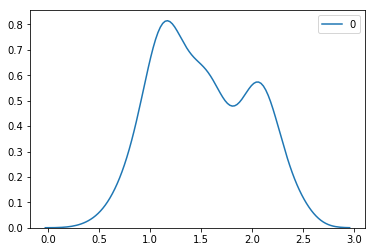

In [172]:
import seaborn as sns
sns.kdeplot(rsmd['0'],)